   year       value_1       value_2    total_value
0  2016   6000.000000   6000.000000   12000.000000
1  2017  12020.322728  12034.321066   24054.643794
2  2018  18558.777615  18841.967198   37400.744813
3  2019  25413.608550  19768.629396   45182.237946
4  2020  33026.345304  34271.743609   67298.088913
5  2021  45177.994524  44205.388916   89383.383440
6  2022  47684.104438  52342.242154  100026.346592
7  2023  61530.381963  48910.940814  110441.322777
8  2024  70784.420238  58487.794026  129272.214264
9  2025  89122.466764  77188.249279  166310.716042
Date from 2016 to 2025
Total years: 10
Total invested: ¥120000.00
Portfolio value: ¥166310.72
Profit: ¥46310.72 (3.86%)


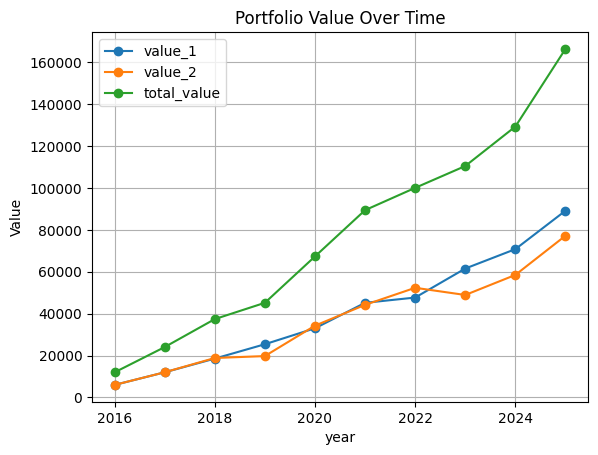

In [ ]:
import pandas as pd

# Load data
asset1 = pd.read_csv("./data/gold.csv", parse_dates=['date'])
asset2 = pd.read_csv("./data/sh000001.csv", parse_dates=['date'])

# Ensure data is sorted
asset1.sort_values('date', inplace=True)
asset2.sort_values('date', inplace=True)

# Merge by date
df = pd.merge(asset1, asset2, on='date', suffixes=('_1', '_2'))
df['year'] = df['date'].dt.year

# Group to yearly first date
yearly_df = df.groupby('year').first().reset_index()
# Initialize tracking variables
invest_per_year = 12000
total_invested = 0

units_1 = 0
units_2 = 0

portfolio_history = []

# Simulate year by year
for i, row in yearly_df.iterrows():  
    year = row['year']
    # Use current price of the year for buying
    price_1 = row['close_1']
    price_2 = row['close_2']

    # Invest in both
    units_1 += invest_per_year / price_1
    units_2 += invest_per_year / price_2
    total_invested += invest_per_year * 2

    # Use current price of the year for rebalancing
    end_price_1 = row['close_1']
    end_price_2 = row['close_2']

    value_1 = units_1 * end_price_1
    value_2 = units_2 * end_price_2
    total_value = value_1 + value_2

    # Rebalancing rule: if one asset > half of portfolio, rebalance
    if value_1 > total_value / 2:
        excess = value_1 - total_value / 2
        units_1 -= excess / end_price_1
        units_2 += excess / end_price_2
    elif value_2 > total_value / 2:
        excess = value_2 - total_value / 2
        units_2 -= excess / end_price_2
        units_1 += excess / end_price_1

    # Record the portfolio
    portfolio_history.append({
        'year': year,
        'value_1': value_1,
        'value_2': value_2,
        'total_value': value_1 + value_2
    })

# Display results
portfolio_df = pd.DataFrame(portfolio_history)
portfolio_df.to_csv("./data/rebalance.csv", index=False, encoding="utf-8-sig")

print(portfolio_df)
# Final result
total_year = yearly_df['year'].size

portfolio_value = portfolio_df['total_value'].iloc[-1]
profit = portfolio_value - total_invested

print(f"Date from {yearly_df['year'][0]} to {yearly_df['year'].iloc[-1]}")
print(f"Total years: {total_year}")
print(f"Total invested: ¥{total_invested:.2f}")
print(f"Portfolio value: ¥{portfolio_value:.2f}")
print(f"Profit: ¥{profit:.2f} ({profit / total_invested / total_year:.2%})")# Plotting (optional)
import matplotlib.pyplot as plt

portfolio_df.set_index('year')[['value_1', 'value_2', 'total_value']].plot(marker='o')
plt.title('Portfolio Value Over Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()
